In [71]:
#import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import codecs
import collections
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import json

In [2]:
dataopen = open('instagram_2.json','r',encoding='utf-8')
imf = []
tagf = []
label = []
for line in dataopen:
    dic = json.loads(line)
    dic_l = {'label':dic['label']}
    imf.append(dic['imgfeatures'])
    tagf.append(dic['tags'])
    label.append(dic_l)
df_imf    = pd.DataFrame(imf)
df_l      = pd.DataFrame(label)
df_tagf   = pd.DataFrame(tagf)
df_imf_l  = pd.concat([df_imf,df_l],axis=1)
df_tagf_l = pd.concat([df_tagf,df_l],axis=1)


In [32]:

mean_im_al = []
im_al = []
for i in df_imf.columns:
    im_al.append(i)
    mean_im_al.append(np.sum(df_imf_l[df_imf_l['label'] == 'alcohol'][i]))
    
mean_im_nal = []
im_nal = []
for i in df_imf.columns:
    im_nal.append(i)
    mean_im_nal.append(np.sum(df_imf_l[df_imf_l['label'] == 'nonalcohol'][i]))

mean_tag_al = []
tag_al = []
for i in df_tagf.columns:
    tag_al.append(i)
    mean_tag_al.append(np.sum(df_tagf_l[df_tagf_l['label'] == 'alcohol'][i]))

mean_tag_nal = []
tag_nal = []
for i in df_tagf.columns: 
    tag_nal.append(i)
    mean_tag_nal.append(np.sum(df_tagf_l[df_tagf_l['label'] == 'nonalcohol'][i]))


In [120]:

df_im_al = pd.DataFrame(mean_im_al, columns=['image_alcohol'],index =im_al)
df_im_al = df_im_al.sort_values(by = 'image_alcohol',ascending=False).head(30)


df_im_nal = pd.DataFrame(mean_im_nal, columns=['image_nonalcohol'],index =im_nal)
df_im_nal = df_im_nal.sort_values(by = 'image_nonalcohol',ascending= False).head(30)


df_tag_al = pd.DataFrame(mean_tag_al, columns=['tag_alcohol'],index =tag_al)
df_tag_al = df_tag_al.sort_values(by = 'tag_alcohol',ascending=False).head(30)


df_tag_nal = pd.DataFrame(mean_tag_nal, columns=['tag_nonalcohol'],index =tag_nal)
df_tag_nal = df_tag_nal.sort_values(by = 'tag_nonalcohol',ascending=False).head(30)


In [121]:
count     = 0
im_a_na   = []
tag_a_na  = []
a_im_tag  = []
na_im_tag = []
while count < 30:
    
    pair = []
    pair.append(df_im_al.index[count])
    pair.append(df_im_nal.index[count])
    im_a_na.append(pair)
    
    pair = []
    pair.append(df_tag_al.index[count])
    pair.append(df_tag_nal.index[count])
    tag_a_na.append(pair)
    
    pair = []
    pair.append(df_im_al.index[count])
    pair.append(df_tag_al.index[count])
    a_im_tag.append(pair)
    
    pair = []
    pair.append(df_im_nal.index[count])
    pair.append(df_tag_nal.index[count])
    na_im_tag.append(pair)
    
    count = count+1
im_a_na   = pd.DataFrame(im_a_na,columns=['image_alcohol','image_nonalcohol'])
tag_a_na  = pd.DataFrame(tag_a_na,columns=['tag_alcohol','tag_nonalcohol'])
a_im_tag  = pd.DataFrame(a_im_tag,columns=['alcohol_image','alcohol_tag'])
na_im_tag = pd.DataFrame(na_im_tag,columns=['nonalcohol_image','nonalcohol_tag'])


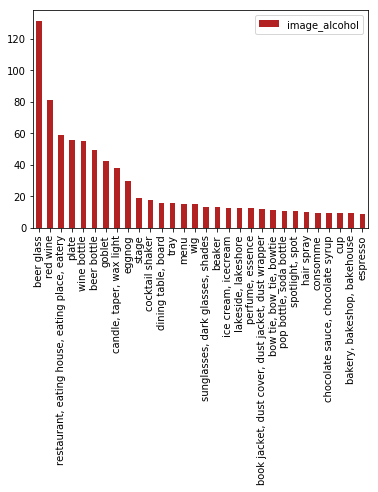

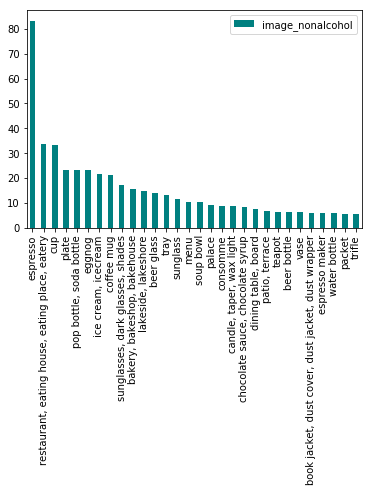

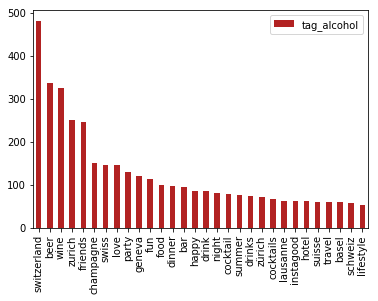

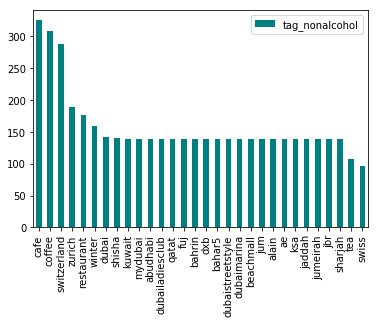

In [122]:
df_im_al.plot(kind='bar',color = 'firebrick')
plt.show()


df_im_nal.plot(kind='bar',color = 'teal')
plt.show()


df_tag_al.plot(kind='bar',color = 'firebrick')
plt.show()


df_tag_nal.plot(kind='bar',color = 'teal')
plt.show()


In [123]:
im_a_na 

,image_alcohol,image_nonalcohol
0,beer glass,espresso
1,red wine,"restaurant, eating house, eating place, eatery"
2,"restaurant, eating house, eating place, eatery",cup
3,plate,plate
4,wine bottle,"pop bottle, soda bottle"
5,beer bottle,eggnog
6,goblet,"ice cream, icecream"
7,"candle, taper, wax light",coffee mug
8,eggnog,"sunglasses, dark glasses, shades"
9,stage,"bakery, bakeshop, bakehouse"


In [124]:
tag_a_na  

,tag_alcohol,tag_nonalcohol
0,switzerland,cafe
1,beer,coffee
2,wine,switzerland
3,zurich,zurich
4,friends,restaurant
5,champagne,winter
6,swiss,dubai
7,love,shisha
8,party,kuwait
9,geneva,mydubai


In [125]:
a_im_tag

,alcohol_image,alcohol_tag
0,beer glass,switzerland
1,red wine,beer
2,"restaurant, eating house, eating place, eatery",wine
3,plate,zurich
4,wine bottle,friends
5,beer bottle,champagne
6,goblet,swiss
7,"candle, taper, wax light",love
8,eggnog,party
9,stage,geneva


In [126]:
na_im_tag 

,nonalcohol_image,nonalcohol_tag
0,espresso,cafe
1,"restaurant, eating house, eating place, eatery",coffee
2,cup,switzerland
3,plate,zurich
4,"pop bottle, soda bottle",restaurant
5,eggnog,winter
6,"ice cream, icecream",dubai
7,coffee mug,shisha
8,"sunglasses, dark glasses, shades",kuwait
9,"bakery, bakeshop, bakehouse",mydubai


In [127]:
#alcohol is 1 positive and nonalcohol is nagetive "0"
np_l = []
for i in np.array(df_l):
    if i == ['alcohol']:
        np_l.append(1)
    else:
        np_l.append(0)
    #print(i)
np_l=np.array(np_l)

In [128]:

df_imf_tag  = pd.concat([df_imf,df_tagf],axis=1)

clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
Xi = np.array(df_imf)
Xt = np.array(df_tagf)
Xit= np.array(df_imf_tag)
y = np_l
kfold = KFold(n_splits=10, shuffle = True, random_state= 1)


In [77]:
scores_i_a = cross_val_score(clf, Xi, y, scoring='accuracy', cv = kfold)
scores_t_a = cross_val_score(clf, Xt, y, scoring='accuracy', cv = kfold)
scores_it_a = cross_val_score(clf, Xit, y, scoring='accuracy', cv = kfold)

In [78]:
print("mean accuracy of model if only use image feature:",np.mean(scores_i_a))
print("mean accuracy of model if only use hashtag feature:",np.mean(scores_t_a))
print("mean accuracy of model when using both hashtag and image feature:",np.mean(scores_it_a))

mean accuracy of model if only use image feature: 0.674
mean accuracy of model if only use hashtag feature: 0.678
mean accuracy of model when using both hashtag and image feature: 0.6903333333333332


In [131]:
scores_i_p = cross_val_score(clf, Xi, y, scoring='precision', cv = kfold)
scores_t_p = cross_val_score(clf, Xt, y, scoring='precision', cv = kfold)
scores_it_p = cross_val_score(clf, Xit, y, scoring='precision', cv = kfold)

In [80]:
print("mean precision of model if only use image feature:",np.mean(scores_i_p))
print("mean precision of model if only use hashtag feature:",np.mean(scores_t_p))
print("mean precision of model when using both hashtag and image feature:",np.mean(scores_it_p))

mean precision of model if only use image feature: 0.6569684760026971
mean precision of model if only use hashtag feature: 0.6597834742279687
mean precision of model when using both hashtag and image feature: 0.6685433606211176


In [81]:
scores_i_r = cross_val_score(clf, Xi, y, scoring='recall', cv = kfold)
scores_t_r = cross_val_score(clf, Xt, y, scoring='recall', cv = kfold)
scores_it_r = cross_val_score(clf, Xit, y, scoring='recall', cv = kfold)

In [82]:
print("mean recall of model if only use image feature:",np.mean(scores_i_r))
print("mean recall of model if only use hashtag feature:",np.mean(scores_t_r))
print("mean recall of model when using both hashtag and image feature:",np.mean(scores_it_r))

mean recall of model if only use image feature: 0.9995169082125603
mean recall of model if only use hashtag feature: 1.0
mean recall of model when using both hashtag and image feature: 1.0


## descussion  

experimental setup

At first,I transfer the label "alochol" into positive as "1","nonalochol"into nagetive as "0".And generated 3 feature set which is imagefeature set, tagfeature set and set with both image and tag features.

Then I import the random forest model from sklearn and set classifier as "README" instructed (n_estimators=100, max_depth=2,random_state=0)

import crossvalidation tool K-fold and Cross-score,I set K as 10 to do a 10-fold crossvalidation.and set scoring as "accuracy","precision" and "recall" separately to get these three values.

About most common features

For 30 highest of alcohol labeled tweets both in imagefeatures and tags,I noticed that the imagefeatures are more directly related to alcohol drinks, suche as beer, wine, etc.But the tags are more related to the item related to alcohol drinks. For example, the situation where there probably will be someone drink alcohol,such as party or with friends.

For nonalcohol features,the regular pattern is more hard to sum up in tags features .But in imagefeatures, the situation is quite similar to image features in alcohol labeled tweets，there will be some other drinks like coffee, soda,which are nonalcoholic drink.but there is one interesting I noticed is that beer is also high frequency imagefeature in nonalcohol labeled tweets.

About the result of classification 

The classification it self is easy to achieve, which is probably because we can use exist tool to run RF directly.

But the result is not so satisified, both accuracy and precision are very high.

But what surprised me is that the recall value is very high, which means almost all the alcohol items are been detected, even if there are a lot of nonalcohol samples are wrongly detected as alcohol one.

And the result of using tags is a little better than the result of using imagefeatures,but in general they are are similar. And I also use both imagefearures and tags to run RF, the result is better than using only tags.

